#                            EDA On Titinanic Dataset using MYSQL connection

This projects is divided into two parts as follows:-

    1)MYSQL Activities and its connection with python notebook.
    
    2)EDA process using jupyter Notebook after the Connection is established with MYSQL. 

# PART 1-> MYSQL Activities and its connection with python notebook.

The below codes are executed in command prompt:-
    After putting the complete path of the mysql exe file in cmd below codes are executed
    
    -->mysql --local-infile=1 -u root -p # enter the password after pressing enter
    
    --> show databases;# this command shows the databases available .
    
    ---> use sakila;
    
    ---> show table ;
    
    --->create table titanic_train(
        
            Passenger varchar(50),
        
            Survived varchar(10),
        
            Pclass varchar(50),
        
            Name varchar(300),
        
            Sex varchar(10),
        
            age varchar(10),
        
            SibSp varchar(10),
        
            Parch varchar(10),
        
            Ticket varchar(50),
        
            Fare varchar(50),
        
            Cabin varchar(50),
        
            Embarked varchar(50),
        
            check(Sex in ('male', 'female'))
        
            );
    ---> show global variable like 'local_infile'#if local_infile is OFF , need to set it true using below code
    
    ---> set global local_infile=true # this will set true the local infile so that we can import the data into mysql table
    
    Now, import the titanic_train.csv into the mysql table titanic_train by using below command
    
    ---> load data local infile 'here gives the path of the titanic_train.csv' into table titanic_train
        fields terminated by ','
        enclosed by '""'
        lines terminated by '\r\n';
        
    run select query in order to analyse the data
    
    ---> select * from titanic_train;

# Part 2 - EDA process using jupyter Notebook after the Connection is established with MYSQL.

Importing the libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
import mysql.connector # importing mysql.connector in order to establish a connection with mysql
import pandas as pd
con=mysql.connector.connect(
    host='localhost',
    port=3306,
    user='root',
    password='@@@@@@',
    database='sakila')

Importing the data into data variable by using a dataFrame 'read_sql_query' to read the query the on titanic_train table 
on a connection con

In [8]:

data=pd.DataFrame(pd.read_sql_query('select * from titanic_train',con))
data.head()


,Passenger,Survived,Pclass,Name,Sex,age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S


Checking the shape of the data

In [10]:
data.shape

(891, 12)

# Null Values Analysis

In [11]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

It is been found that Columns like Age,Cabin,Embarked are having  null values which are also bein checked using heatmap below .

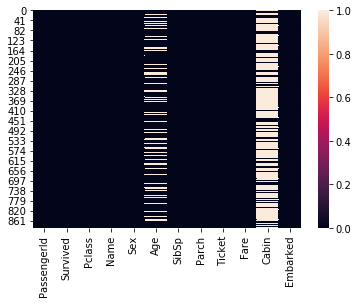

In [13]:
sns.heatmap(data.isnull())

We can see in the above heatmap that Age , Cabin , Embarked are having non black shade which signifies that they are having NAN , which should be replaced for future analysis

# Replacing NAN Values

In [14]:
#Replace Nan values
data['Age'].fillna(data['Age'].mean(),inplace=True)
data['Cabin'].fillna(data['Cabin'].mode().values[0],inplace=True)
data['Embarked'].fillna(data['Embarked'].mode().values[0],inplace=True)


In [15]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

After replacing Nan values it can be seen above  that the data is free from NAN values .

In [16]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


Dropping Ticket and Name as they are having non numeric values

In [17]:
data.drop(['Ticket','Name'],axis=1 , inplace=True)

# Encoding the Categorical Column

In [18]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
list1=['Sex','Embarked','Cabin']
for val in list1:
    data[val]=Le.fit_transform(data[val].astype(str))

In [22]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,47,2
1,2,1,1,0,38.0,1,0,71.2833,81,0
2,3,1,3,0,26.0,0,0,7.9250,47,2
3,4,1,1,0,35.0,1,0,53.1000,55,2
4,5,0,3,1,35.0,0,0,8.0500,47,2


# Co-Relation Matrix

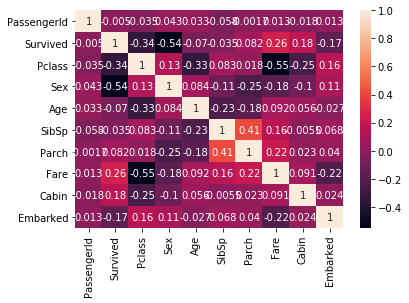

In [19]:
df_cor=data.corr()
sns.heatmap(df_cor,annot=True)

# 1.UNIVARIATE Analysis

# 1.1 Box Plots

PassengerId        AxesSubplot(0.125,0.71587;0.168478x0.16413)
Survived        AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Pclass          AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Sex             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Age               AxesSubplot(0.125,0.518913;0.168478x0.16413)
SibSp          AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Parch          AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Fare           AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Cabin             AxesSubplot(0.125,0.321957;0.168478x0.16413)
Embarked       AxesSubplot(0.327174,0.321957;0.168478x0.16413)
dtype: object

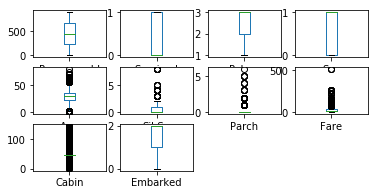

In [20]:
data.plot(kind='box',subplots=True , layout=(4,4))

from the above figure we can see the outliers in cabin , parch , fare , therefore box plot is also used to check the outliers

# 1.2 Dist Plots

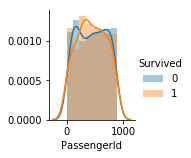

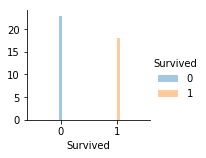

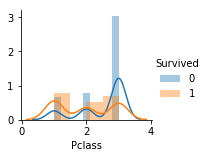

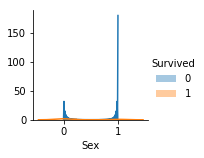

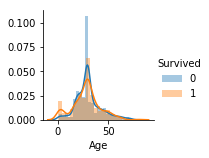

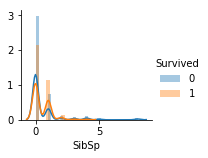

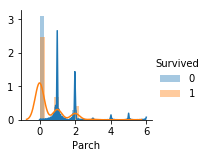

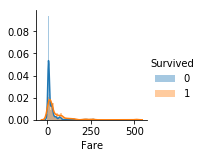

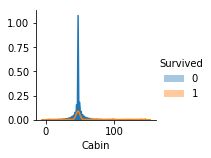

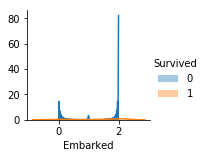

In [24]:
import warnings
warnings.filterwarnings("ignore")
columns=data.columns
for val in columns:
#Plotting Probablity Density Function Curve for the age : -
    sns.FacetGrid(data,hue="Survived",size=2.3)\
    .map(sns.distplot,val)\
    .add_legend();
plt.show();

# 2.BIVARIATE Analysis

# 2.1 PairPlots

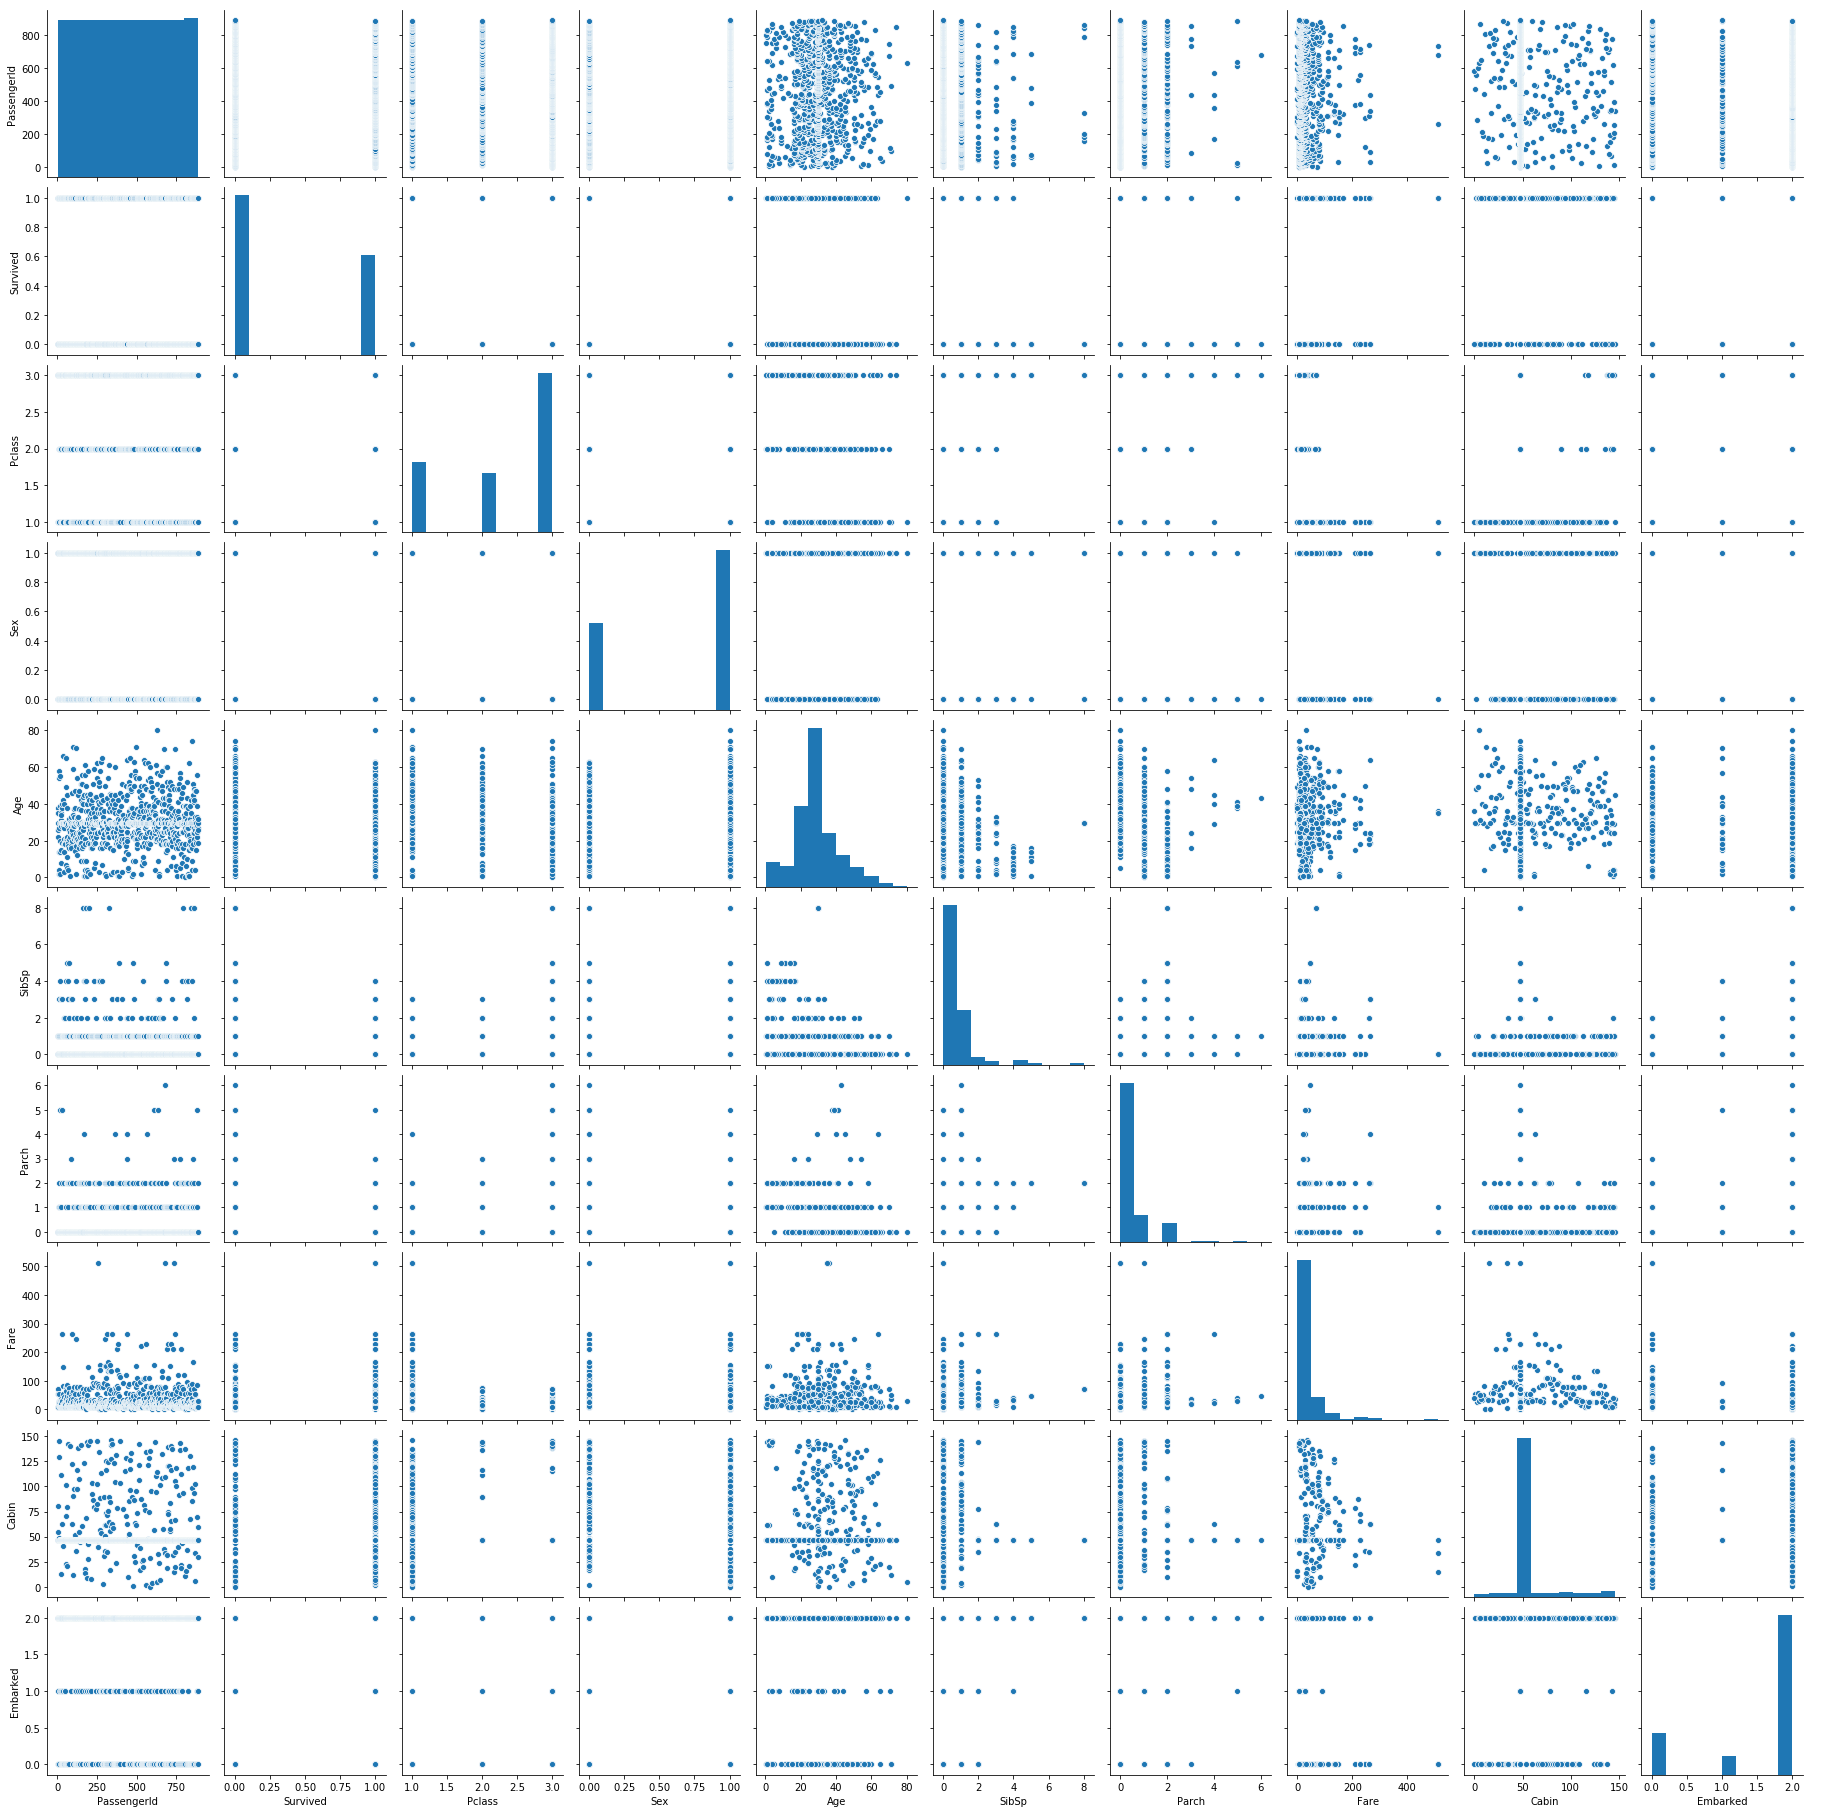

In [27]:
sns.pairplot(data)

After the work on python notebook is over it is a best practice to close connection with Mysql
therefore closing the connection by using below code

In [26]:
con.close()